# OUI energy challenge

## goal of the challenge

predict the state of any charging station at any date

## functional analysis

impact of the terminals of the same station/street/neighborhood : if some are down, occupied, the probability of another being used increases
the impact of bad meteorological conditions  : 
- the batteries in charge will load more slowly
- more people will drive (delayed impact as bad weather in the morning means taking car for the whole day; check impact of near zero temperature which means snow); maybe not because of telework?
- less people will want to go for a drive
- the batteries of driving cars will drain faster (delayed impact)
the impact of time of day :
- more charging at night (beginning of the night?)
- more charging during weekend?
the impact of seasonality :
- might be correlated with meteorological conditions
- impact of lockdown?
- increasing nb of electric vehicles (additional data required?)
the impact of traffic fluidity
- cars stuck in traffic will not charge
- cars stuck in traffic will drain more power for the same distance (delayed impact)

status of the terminal :
- charging, availabe, passive: obvious
- offline / Nan : interpolated?
- down : is it predictable? is it the same as passive (not available but not charging)?

In [83]:
import pandas as pd
import numpy as np

In [84]:
#################
# import the data
#################
x_train = pd.read_csv("xtrain.csv")
x_train.head()
# should quadruple every line since the interval is hour vs quarterhour for y data

y_train = pd.read_csv("ytrain_NpxebDC.csv",index_col='timestamp',parse_dates=True)
y_train_sub = y_train
y_train_sub.head()
# merge x and y
# add other info (static)

,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,S62-T3,...,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-25 00:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,Down,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
2019-11-25 00:15:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,Down,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
2019-11-25 00:30:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,Down,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
2019-11-25 00:45:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,Down,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
2019-11-25 01:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,Down,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN


In [85]:
#################
# clean the data
#################
#y_train_sub.dtypes

# transform the data : charging is 1, down, available,passive is 0, offline is NaN
def numerize(x):
    if x == 'Down'or (x == 'Available') or (x == 'Passive'):
        return '0'
    elif (x == 'Charging'):
        return '1'
    else:
        return np.nan
#.loc[:, y_train_sub.columns != 'timestamp']
y_train_sub = y_train_sub.applymap(numerize)




In [97]:
# remove unwanted data


# interpolate missing data
for column in y_train_sub:
    y_train_sub[column] = pd.to_numeric(y_train_sub[column])
y_train_interp=y_train_sub.interpolate(method='nearest')
#y_train_clean=y_train_interp.dropna(axis='columns')
y_train_clean=y_train_interp
#y_train_interp.head()
y_train_clean.head()

,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,S62-T3,...,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-11-25 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-11-25 00:15:00+00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-11-25 00:30:00+00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-11-25 00:45:00+00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-11-25 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [105]:
testdf = y_train_clean.loc['2019-12-01':'2020-06-12']
testdf.head()

,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,S62-T3,...,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-12-01 00:15:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-12-01 00:30:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-12-01 00:45:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-12-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [106]:
testdf2=testdf.groupby(pd.Grouper(freq='D')).sum()

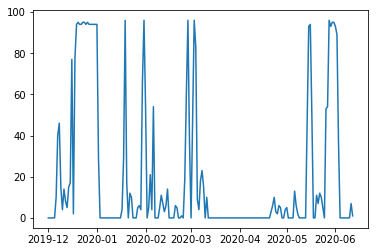

In [113]:
import matplotlib.pyplot as plt
#from pandas.plotting import register_matplotlib_converter
#register_matplotlib_converters()

plt.plot(testdf2.index, testdf2["S94-T3"])
plt.show()

In [ ]:
##################
# transformation
##################

# ideas : nb of quarters charging per day

In [ ]:
##################
# exploratory data analysis
##################

# plot some data to see if it is stationary, identify seasonaity...
# moving average

# exponential moving average

# double exponential moving average

# dickey fuller